In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv('riceClassification.csv')
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [3]:
df.drop(["id","Class"],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.4 MB


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [7]:
scaled_data=scaler.transform(df)
scaled_data

array([[-1.70363043, -4.80374424,  0.41792669, ..., -2.66177825,
         0.83958835, -2.66379989],
       [-2.83847845, -6.22078914, -0.83561103, ..., -4.85731791,
         1.83721534, -2.6354184 ],
       [-2.71851854, -6.09140363, -0.77169963, ..., -4.79985991,
         2.3835873 , -2.60595002],
       ...,
       [-0.45768318,  0.25018706, -0.6857677 , ..., -0.31708508,
        -0.37389933,  0.75045135],
       [-0.73372729, -0.02285299, -0.82824173, ..., -0.27918653,
        -1.08116545,  0.7868348 ],
       [-0.61513056,  0.11322075, -0.81671191, ..., -0.44047571,
        -0.53075529,  0.84669604]])

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca=PCA(n_components=2)

In [10]:
pca.fit(scaled_data)

PCA(n_components=2)

In [11]:
x_pca=pca.transform(scaled_data)

In [12]:
scaled_data.shape

(18185, 10)

In [13]:
x_pca.shape

(18185, 2)

In [14]:
x_pca

array([[ 0.35408319,  8.44244654],
       [ 2.85491984, 11.01374522],
       [ 2.48280546, 11.05660034],
       ...,
       [ 1.48825346, -0.66273891],
       [ 2.20307787, -0.80484537],
       [ 1.96980776, -0.71083772]])

In [15]:
x_pca

array([[ 0.35408319,  8.44244654],
       [ 2.85491984, 11.01374522],
       [ 2.48280546, 11.05660034],
       ...,
       [ 1.48825346, -0.66273891],
       [ 2.20307787, -0.80484537],
       [ 1.96980776, -0.71083772]])

In [17]:
X=x_pca

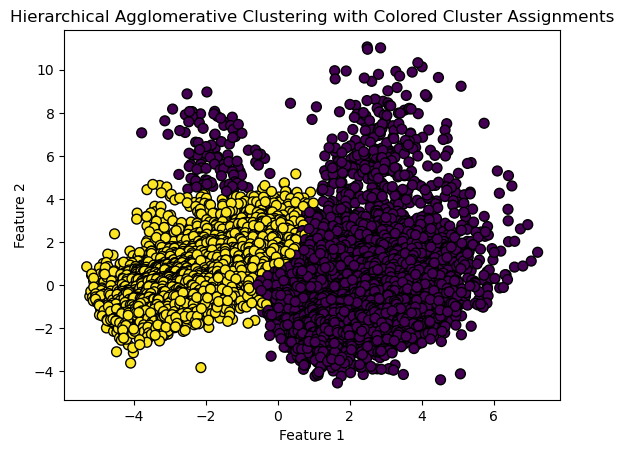

In [25]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
cluster_assignments = agg_clustering.fit_predict(X)

# Plot the data points with colored cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', edgecolors='k', s=50)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hierarchical Agglomerative Clustering with Colored Cluster Assignments')

# Show the plot
plt.show()

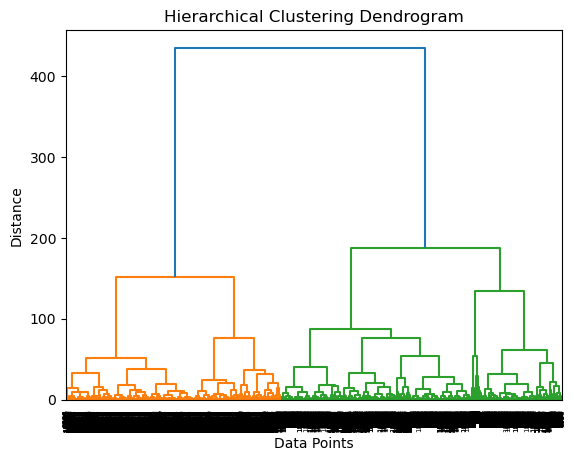

In [20]:
# Dendrogram
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [21]:
cluster_assignments = agg_clustering.fit_predict(X)

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
silhouette_avg = silhouette_score(X, cluster_assignments)
print(f"Silhouette Score (Hierarchical Clustering): {silhouette_avg}")

Silhouette Score (Hierarchical Clustering): 0.4564240737307339
